## OASIS INFOBYTE  -  INTERNSHIP
## TASK 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

## INTRODUCTION :

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features if the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major reserach areas in machine learning.

#### The columns in the given dataset_num_num_num_num_num_num_num_num are as follows:

    1.Car_Name
    2.Year
    3.Selling_Price
    4.Present_Price
    5.Driven_kms
    6.Fuel_Type
    7.Selling_type
    8.Transmission
    9.Owner


## OBJECTIVE: 

Build a predictive machine learning model that can learn from the measurements of the iris species and classify them using data science techniques in Python.


Process :-

    1.Reading and Understanding Data
    2.Extrapolatory Data Analysis
    3.Data Preparation
    4.Building Model and testing
    5.Inference 


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Step 1- Reading and Understanding Data

In [57]:
# import required libraries for dataframe and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [58]:
#LOADING DATASET:

dataset=pd.read_csv("D://DATA//Oasis Infobyte//Task 3 - Car price//car data.csv")
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [59]:
# shape
print("Car Data Size  :" ,dataset.size)
print("Car Data Shape :" ,dataset.shape)

Car Data Size  : 2709
Car Data Shape : (301, 9)


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


No null values and all data is matching its data type

In [61]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [62]:
dataset.describe(include='object').T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Selling_type,301,2,Dealer,195
Transmission,301,2,Manual,261


======================================================================================================================================================

## Step -2 - Extrapolatory Data Analysis

In [63]:
# Dropping the columns as that has no significance here
dataset_num = dataset.drop(["Car_Name", "Fuel_Type", "Selling_type", "Transmission", "Owner"], axis=1)
dataset_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0


In [64]:
dataset_num.insert(0, "Years_old", dataset_num["Year"].max()+1-dataset_num["Year"] )
dataset_num.drop('Year', axis=1, inplace=True)
dataset_num.head()

,Years_old,Selling_Price,Present_Price,Driven_kms
0,5,3.35,5.59,27000
1,6,4.75,9.54,43000
2,2,7.25,9.85,6900
3,8,2.85,4.15,5200
4,5,4.60,6.87,42450


#### Univariate Analysis

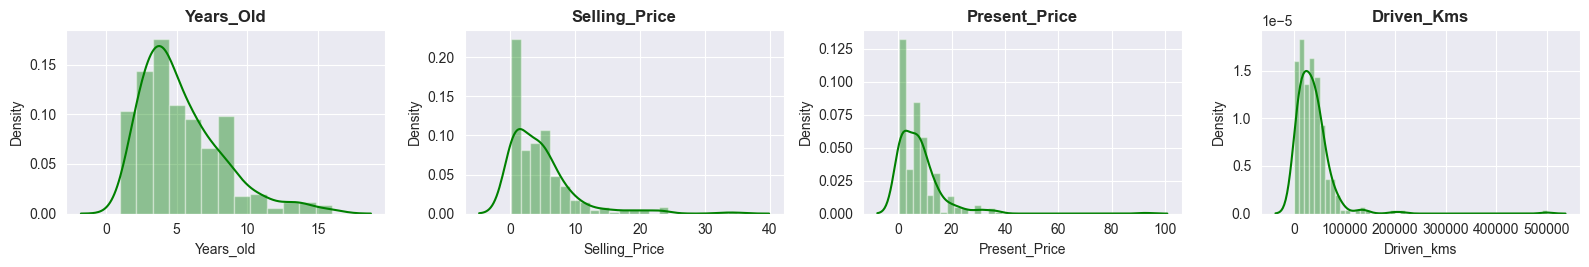

In [65]:
sns.set_style('darkgrid')
# Visualizing the distributions.
plt.figure(figsize=(16,12))
for n,column in enumerate(dataset_num):
  plt.subplot(5, 4, n+1)
  sns.distplot(dataset_num[column], color = 'g')
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

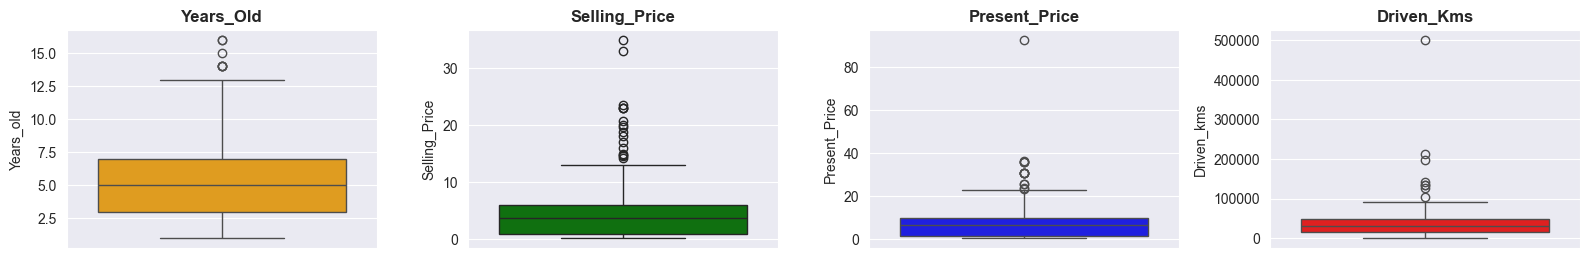

In [66]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.

plt.figure(figsize=(16,12))
colors1 = ['orange', 'green', 'blue', 'red', 'cyan']

for n, column in enumerate(dataset_num.columns):
    plt.subplot(5, 4, n+1)
    sns.boxplot(dataset_num[column], color=colors1[n])
    plt.title(f'{column.title()}', weight='bold')
    plt.tight_layout()

plt.show()

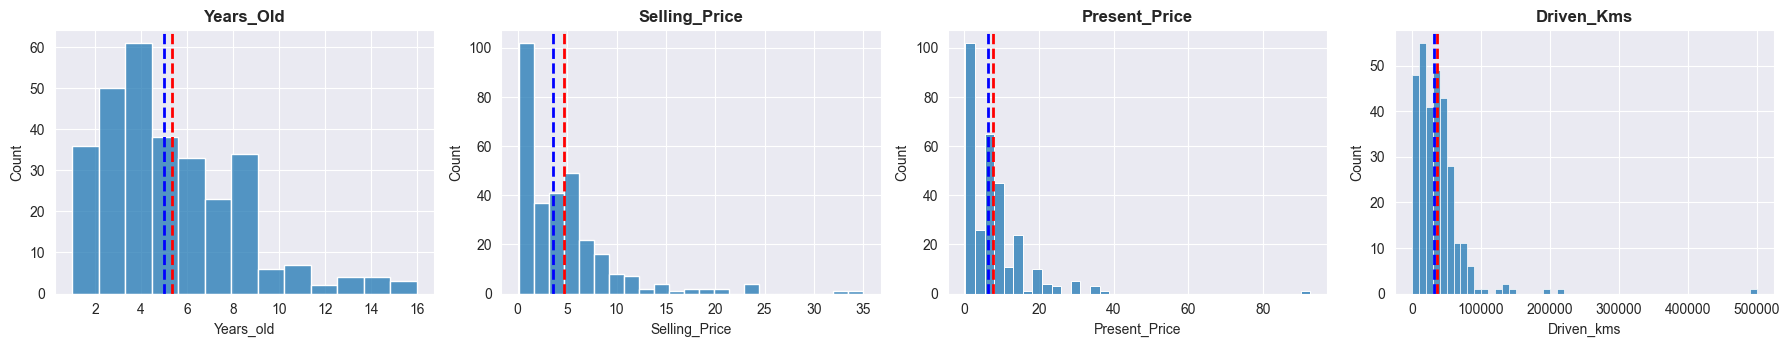

In [67]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n, column in enumerate(dataset_num.columns):
  feature = dataset_num[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Red indicates the mean,

Blue indicates the median

#### Bivariate Analysis

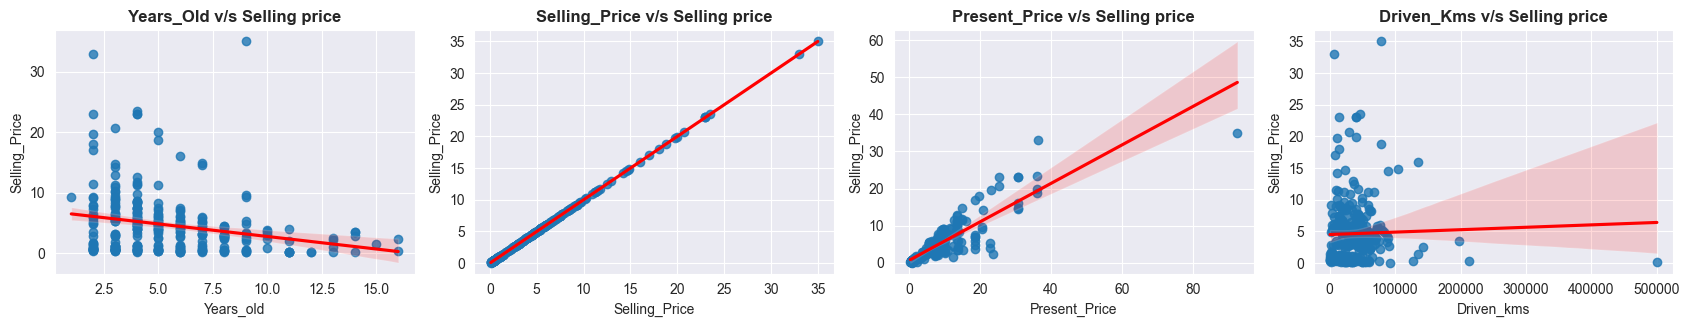

In [68]:
# Checking Linearity
independent_variables = [i for i in dataset_num.columns if i not in ['Selling_Price']]

plt.figure(figsize=(17,15))
for n,column in enumerate(dataset_num.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = dataset_num[column], y = dataset_num['Selling_Price'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s Selling price',weight='bold')
  plt.tight_layout()

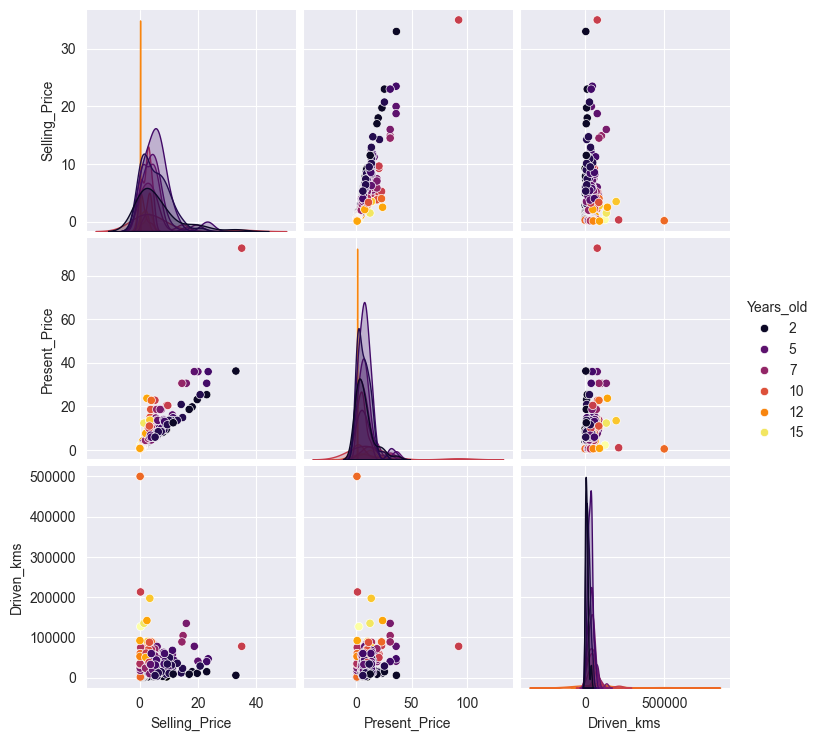

In [69]:
# creating a pair plot
plt.close() 
sns.set_style("darkgrid")
sns.pairplot(dataset_num,hue="Years_old", palette ='inferno')
plt.show()

======================================================================================================================================================

## Step -3 - Data Preparation

In [70]:
# the correlation matrix
dataset_num.corr()

,Years_old,Selling_Price,Present_Price,Driven_kms
Years_old,1.000000,-0.236141,0.047192,0.524342
Selling_Price,-0.236141,1.000000,0.878914,0.029187
Present_Price,0.047192,0.878914,1.000000,0.203618
Driven_kms,0.524342,0.029187,0.203618,1.000000


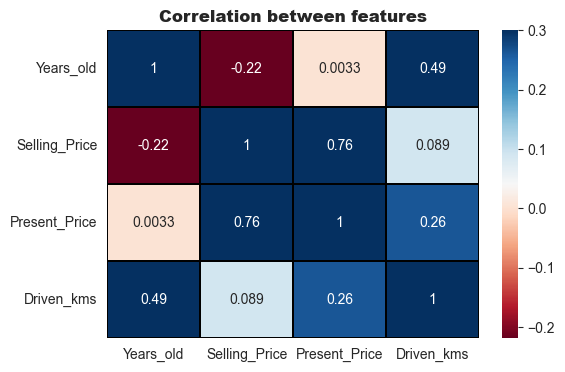

In [71]:
corr = dataset_num.corr(method='kendall')
plt.figure(figsize=(6, 4))
sns.heatmap(corr, vmax=.3, linewidths=0.05, annot=True, cmap='RdBu', linecolor="black")
plt.title('Correlation between features', weight = 'heavy')
plt.show()

======================================================================================================================================================

## Step -4 - Model Building

In [72]:
#Importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [73]:
dataset.drop(["Car_Name","Fuel_Type","Selling_type","Transmission","Owner"],axis=1,inplace=True)
dataset.head(3)

,Year,Selling_Price,Present_Price,Driven_kms
0,2014,3.35,5.59,27000
1,2013,4.75,9.54,43000
2,2017,7.25,9.85,6900


In [74]:
#SPLITTING INTO TRAIN AND TEST SETS:
train, test = train_test_split(dataset, test_size = 0.2, random_state=1) 
print(train.shape)
print(test.shape)

(240, 4)
(61, 4)


In [75]:
#EXTRACTING X & Y VALUES:

X_train = train[['Year', 'Present_Price', 'Driven_kms']]

Y_train = train.Selling_Price

X_test = test[['Year', 'Present_Price', 'Driven_kms']]

Y_test = test.Selling_Price

In [76]:
#FITTING Logistic REGRESSION INTO THE MODEL:

ml_model=LinearRegression()
ml_model.fit(X_train,Y_train)

LinearRegression()

In [77]:
#PREDICTION OF TEST AND TRAINING TEST RESULTS:

X_pred=ml_model.predict(X_train)
Y_pred=ml_model.predict(X_test)

In [78]:
# CHECKING ACCURACY(score) OF TRAINING AND TEST DATA:

train_score=ml_model.score(X_train,Y_train)
test_score=ml_model.score(X_test,Y_test)         

print("score of train set is  : " , '{0:.2}'.format(train_score))
print("score of test set is   : " , '{0:.2}'.format(test_score))

score of train set is  :  0.85
score of test set is   :  0.86


In [80]:
#OUTPUT PREDICTION:

#entering inputs:
Year=int(input("enter the year : "))
Present_Price=float(input("enter the present price  : "))
Kms_Driven=int(input("enter kilometers driven : "))

#building a predictive system:
arr=[Year,Present_Price,Kms_Driven]
input1=arr

# changing input data into numpy array:
input1_as_numpy_array=np.asarray(input1)

#reshaping input:
input1_reshaped=input1_as_numpy_array.reshape(1,-1)

#predicting output:
prediction=ml_model.predict(input1_reshaped)

#displaying prediction:
Selling_Price=float(prediction)
print("SELLING PRICE OF THE CAR IS : " ,'{0:.4}'.format(Selling_Price) , "LAKHS" )

SELLING PRICE OF THE CAR IS :  4.593 LAKHS


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 